In [104]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [105]:
BES = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.3.dta")
#print(BES.describe())
# 31409 rows × 733 columns

In [106]:
BES.dtypes.value_counts()

category          664
object             33
float64            20
int8                8
datetime64[ns]      6
int32               1
int16               1
dtype: int64

In [107]:
category_features = BES.columns[BES.dtypes=="category"]
category_features

Index(['country', 'generalElectionVote', 'generalElectionVoteW9', 'partyId',
       'partyIdSqueeze', 'partyIdEU', 'partyIdW9', 'partyIdSqueezeW9',
       'partyIdEUretroW9', 'countryOfBirth',
       ...
       'polKnowOsborne', 'polKnowMay', 'polKnowBercow', 'subjectHE',
       'subjectHECurrent', 'edlevel', 'profile_turnout_2015',
       'profile_past_vote_2015', 'lr_scale', 'al_scale'],
      dtype='object', length=664)

In [108]:
a = BES[category_features].stack().value_counts()

In [109]:
t = [s for s in list(a.keys()) if isinstance(s,str) and "no".lower() in s.lower()]
a[t]

No                                                                     1140530
Don't know                                                             1059162
Neither agree nor disagree                                              260570
No formal qualifications                                                 60407
Neither united nor divided                                               51231
None, no time at all                                                     34715
Neither good nor bad for Britain                                         33325
No, not at any level                                                     23102
No, did not vote                                                         22181
Not at all certain                                                       21933
North West                                                               20773
Not gone far enough                                                      19635
No, I have never been a member                      

In [110]:
# Candidate generic "non-answers#
# Don't know 1059162
# Prefer not to answer    9670
# Prefer not to say       2122



In [118]:
# def remove_dont_know(val):
#     if (val == "Don't know") or (val == "Prefer not to answer") or (val == "Prefer not to say"):
#         val = np.nan.astype('category')
#     return val

In [119]:
BES[category_features].dtypes

country                         category
generalElectionVote             category
generalElectionVoteW9           category
partyId                         category
partyIdSqueeze                  category
partyIdEU                       category
partyIdW9                       category
partyIdSqueezeW9                category
partyIdEUretroW9                category
countryOfBirth                  category
ukCitizen                       category
euCitizen                       category
commonwealthCitizen             category
otherCitizen                    category
mii                             category
bestOnMII                       category
postalapply                     category
postalTurnout                   category
euRefVotePost                   category
euRefTurnout                    category
euRefVote                       category
euRefVoteSqueeze                category
euRefCertainty                  category
euRefInterest                   category
euRefExpectation

In [124]:
BES_clean = BES[category_features].copy()
for col in category_features:
    BES_clean[col][ BES_clean[col]=="Don't know" ]           = np.nan
    BES_clean[col][ BES_clean[col]=="Prefer not to answer" ] = np.nan
    BES_clean[col][ BES_clean[col]=="Prefer not to say" ]    = np.nan
    
# if (val == "Don't know") or (val == "Prefer not to answer") or (val == "Prefer not to say"):    
    
BES_clean.dtypes


country                         category
generalElectionVote             category
generalElectionVoteW9           category
partyId                         category
partyIdSqueeze                  category
partyIdEU                       category
partyIdW9                       category
partyIdSqueezeW9                category
partyIdEUretroW9                category
countryOfBirth                  category
ukCitizen                       category
euCitizen                       category
commonwealthCitizen             category
otherCitizen                    category
mii                             category
bestOnMII                       category
postalapply                     category
postalTurnout                   category
euRefVotePost                   category
euRefTurnout                    category
euRefVote                       category
euRefVoteSqueeze                category
euRefCertainty                  category
euRefInterest                   category
euRefExpectation

In [126]:
BES_clean[category_features].stack().value_counts()

No                            1140530
Agree                          558891
Yes                            514181
5                              290549
Strongly agree                 271647
Disagree                       264865
Neither agree nor disagree     260570
Strongly dislike               199084
4                              185468
2                              182971
3                              182759
6                              178283
7                              146539
About the same                 129192
Mainly remain                  117590
8                              114630
1                              110554
Strongly disagree              106923
Yes, voted                     102982
2.0                             90022
Very unlikely                   88345
Fairly evenly divided           73870
False                           73410
1                               67365
Staying about the same          65939
Fairly united                   64350
Allow many f

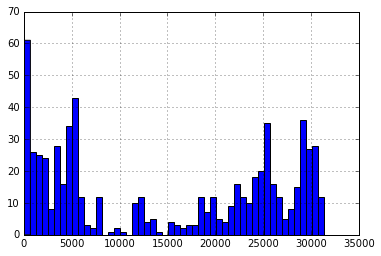

In [127]:
BES_clean.count().hist(bins=50)

In [128]:
columns_to_drop = BES_clean.columns[BES_clean.count()<10000]
columns_to_drop

Index(['partyIdSqueeze', 'partyIdSqueezeW9', 'ukCitizen', 'euCitizen',
       'commonwealthCitizen', 'otherCitizen', 'postalTurnout', 'euRefVotePost',
       'euRefVoteSqueeze', 'scottishness',
       ...
       'selfOccSuperviseLastW9', 'selfOccOrgSizeLastW9',
       'selfOccEmployeesLastW9', 'speakWelsh', 'selfNumEmployees',
       'selfNumEmployeesLast', 'fatherNumEmployees', 'motherNumEmployees',
       'subjectHE', 'subjectHECurrent'],
      dtype='object', length=297)

In [129]:
BES_clean_full = BES_clean.drop(columns_to_drop,axis=1)
BES_clean_full

,country,generalElectionVote,generalElectionVoteW9,partyId,partyIdEU,partyIdW9,partyIdEUretroW9,countryOfBirth,mii,bestOnMII,...,polKnowMiliband,polKnowClegg,polKnowOsborne,polKnowMay,polKnowBercow,edlevel,profile_turnout_2015,profile_past_vote_2015,lr_scale,al_scale
0,England,United Kingdom Independence Party (UKIP),United Kingdom Independence Party (UKIP),Labour,Mainly leave,Labour,Mainly remain,England,Issue stated,United Kingdom Independence Party (UKIP),...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,NaN,"Yes, voted",Labour,0.5,8
1,England,Conservative,Conservative,Conservative,Fairly evenly split,Conservative,Fairly evenly split,England,Issue stated,No party is best able to handle this issue,...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Undergraduate,"Yes, voted",Conservative,7.5,6
2,Scotland,Other,NaN,Scottish National Party (SNP),Fairly evenly split,NaN,NaN,Scotland,Issue stated,United Kingdom Independence Party (UKIP),...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,GCSE A*-C,"Yes, voted",Scottish National Party (SNP),0.5,Authoritarian
3,Wales,Labour,Plaid Cymru,No - none,Mainly remain,Labour,Mainly remain,Wales,Issue stated,Labour,...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Undergraduate,"Yes, voted",Labour,3,3.5
4,England,Conservative,NaN,Conservative,Fairly evenly split,NaN,NaN,England,Issue stated,No party is best able to handle this issue,...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Undergraduate,"Yes, voted",Conservative,5,Authoritarian
5,England,Conservative,Conservative,Conservative,Mainly leave,Conservative,Fairly evenly split,England,Issue stated,United Kingdom Independence Party (UKIP),...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Undergraduate,"Yes, voted",Conservative,6,6
6,England,Conservative,NaN,Conservative,Fairly evenly split,NaN,NaN,England,Issue stated,United Kingdom Independence Party (UKIP),...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Undergraduate,"Yes, voted",Conservative,7.5,9
7,Scotland,Scottish National Party (SNP),Scottish National Party (SNP),No - none,Mainly remain,No - none,Mainly remain,Scotland,Issue stated,Scottish National Party (SNP),...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,Postgrad,"Yes, voted",Scottish National Party (SNP),Left,1.5
8,England,United Kingdom Independence Party (UKIP),United Kingdom Independence Party (UKIP),No - none,Mainly leave,No - none,Mainly leave,England,Issue stated,United Kingdom Independence Party (UKIP),...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,GCSE D-G,"Yes, voted",United Kingdom Independence Party (UKIP),Left,NaN
9,Wales,United Kingdom Independence Party (UKIP),United Kingdom Independence Party (UKIP),Conservative,Mainly remain,Conservative,Fairly evenly split,Wales,Issue stated,United Kingdom Independence Party (UKIP),...,Leader of the Labour Party,Deputy Prime Minister,Chancellor of the Exchequer,Home secretary,Speaker of the House of Commons,A-level,"Yes, voted",United Kingdom Independence Party (UKIP),4,6


0.25    244.0
0.50    305.0
0.75    329.0
dtype: float64

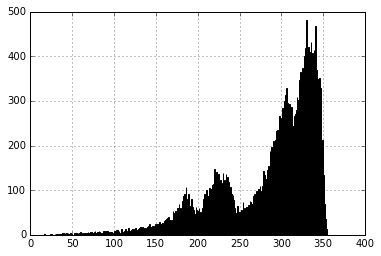

In [130]:
# some of the responders are shit!
BES_clean_full.count(axis=1).hist(bins=367)
BES_clean_full.count(axis=1).quantile([0.25,.5,.75])

In [131]:
BES_clean_full = BES_clean_full.apply(lambda x: x.cat.codes)


In [134]:
BES_clean_full.stack().value_counts()

-1      2596365
 0      2582301
 1      1981346
 2      1365297
 3      1036425
 4       635163
 5       336819
 6       267324
 7       168665
 10      150318
 8       130123
 9        63777
 15       21261
 14       10385
 17        8439
 12        8282
 13        8047
 11        7463
 16        6509
 50        3941
 40        3863
 24        3777
 18        3622
 51        3499
 48        3140
 19        3091
 45        3050
 20        2972
 42        2888
 49        2679
         ...   
 235         35
 356         35
 311         35
 252         35
 379         35
 374         34
 343         34
 316         34
 232         33
 306         32
 234         31
 359         31
 305         30
 352         27
 290         27
 362         27
 315         27
 342         27
 256         26
 209         26
 280         24
 279         24
 354         24
 213         23
 312         22
 335         22
 210         21
 272         20
 288         17
 345         17
dtype: int64

In [135]:
def set_missing_values(val):
    if val == -1:
        val = np.nan
    return val
# note - this will change the columns to float type (can't put nans in a int column)

In [136]:
BES_clean_full = BES_clean_full.applymap(set_missing_values)

In [137]:
BES_clean_full.stack().value_counts()

0.0      2582301
1.0      1981346
2.0      1365297
3.0      1036425
4.0       635163
5.0       336819
6.0       267324
7.0       168665
10.0      150318
8.0       130123
9.0        63777
15.0       21261
14.0       10385
17.0        8439
12.0        8282
13.0        8047
11.0        7463
16.0        6509
50.0        3941
40.0        3863
24.0        3777
18.0        3622
51.0        3499
48.0        3140
19.0        3091
45.0        3050
20.0        2972
42.0        2888
49.0        2679
52.0        2614
          ...   
235.0         35
379.0         35
252.0         35
311.0         35
356.0         35
316.0         34
343.0         34
374.0         34
232.0         33
306.0         32
234.0         31
359.0         31
305.0         30
352.0         27
362.0         27
315.0         27
290.0         27
342.0         27
256.0         26
209.0         26
354.0         24
279.0         24
280.0         24
213.0         23
312.0         22
335.0         22
210.0         21
272.0         

,locusControl,changeIssue1W9,passports_99W9,conLeaderLikeW9
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,NaN,NaN,NaN
3,0.0,0.0,1.0,0.0
4,0.0,NaN,NaN,NaN
5,0.0,0.0,1.0,0.0
6,0.0,NaN,NaN,NaN
7,NaN,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0


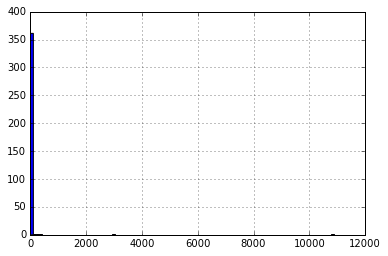

In [157]:
# any zero variance columns?
BES_clean_full.var().hist(bins=100)
BES_clean_full[BES_clean_full.columns[BES_clean_full.var()<.01]]

In [163]:
# add in the personality variables
t = [s for s in list(BES.columns) if "personality".lower() in s.lower()]
t

['personality_agreeableness',
 'personality_conscientiousness',
 'personality_extraversion',
 'personality_neuroticism',
 'personality_openness']

In [164]:
BES[t].count()
# Pretty decent % of missing values

personality_agreeableness        28969
personality_conscientiousness    28969
personality_extraversion         28970
personality_neuroticism          28969
personality_openness             28969
dtype: int64

In [165]:
BES[t].stack().value_counts()
# well behaved set of values!

5.0     38364
6.0     23836
7.0     18950
3.0     15102
8.0     13528
2.0      9817
4.0      6464
1.0      6313
10.0     5328
9.0      3840
0.0      3304
dtype: int64

In [197]:
clean_feature_set = pd.concat([ BES[t], BES_clean_full ], axis=1)

In [198]:
clean_feature_set

,personality_agreeableness,personality_conscientiousness,personality_extraversion,personality_neuroticism,personality_openness,country,generalElectionVote,generalElectionVoteW9,partyId,partyIdEU,...,polKnowMiliband,polKnowClegg,polKnowOsborne,polKnowMay,polKnowBercow,edlevel,profile_turnout_2015,profile_past_vote_2015,lr_scale,al_scale
0,7.0,10.0,5.0,5.0,5.0,0.0,6.0,6.0,1.0,0.0,...,2.0,1.0,0.0,3.0,4.0,NaN,0.0,1.0,1.0,16.0
1,6.0,6.0,5.0,4.0,5.0,0.0,1.0,1.0,0.0,2.0,...,2.0,1.0,0.0,3.0,4.0,4.0,0.0,0.0,15.0,12.0
2,5.0,6.0,1.0,5.0,5.0,1.0,8.0,NaN,3.0,2.0,...,2.0,1.0,0.0,3.0,4.0,2.0,0.0,3.0,1.0,20.0
3,7.0,10.0,1.0,3.0,3.0,2.0,2.0,5.0,8.0,1.0,...,2.0,1.0,0.0,3.0,4.0,4.0,0.0,1.0,6.0,7.0
4,5.0,7.0,2.0,3.0,3.0,0.0,1.0,NaN,0.0,2.0,...,2.0,1.0,0.0,3.0,4.0,4.0,0.0,0.0,10.0,20.0
5,3.0,5.0,0.0,10.0,2.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1.0,0.0,3.0,4.0,4.0,0.0,0.0,12.0,12.0
6,3.0,5.0,3.0,5.0,5.0,0.0,1.0,NaN,0.0,2.0,...,2.0,1.0,0.0,3.0,4.0,4.0,0.0,0.0,15.0,18.0
7,5.0,6.0,2.0,6.0,5.0,1.0,4.0,4.0,8.0,1.0,...,2.0,1.0,0.0,3.0,4.0,5.0,0.0,3.0,0.0,3.0
8,3.0,8.0,5.0,5.0,3.0,0.0,6.0,6.0,8.0,0.0,...,2.0,1.0,0.0,3.0,4.0,1.0,0.0,5.0,0.0,NaN
9,6.0,7.0,3.0,3.0,5.0,2.0,6.0,6.0,0.0,1.0,...,2.0,1.0,0.0,3.0,4.0,3.0,0.0,5.0,8.0,12.0


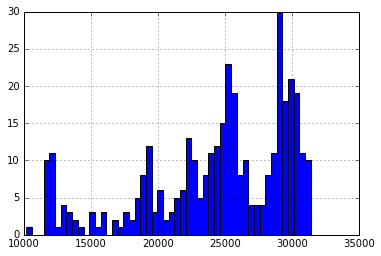

In [206]:
clean_feature_set.count(axis=0).hist(bins=50)

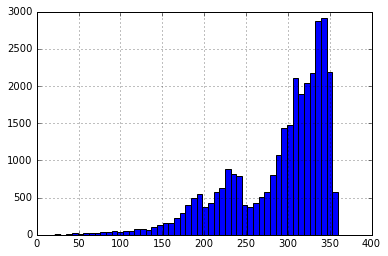

In [205]:
clean_feature_set.count(axis=1).hist(bins=50)

In [208]:
corr = clean_feature_set.corr()

In [209]:
corr

,personality_agreeableness,personality_conscientiousness,personality_extraversion,personality_neuroticism,personality_openness,country,generalElectionVote,generalElectionVoteW9,partyId,partyIdEU,...,polKnowMiliband,polKnowClegg,polKnowOsborne,polKnowMay,polKnowBercow,edlevel,profile_turnout_2015,profile_past_vote_2015,lr_scale,al_scale
personality_agreeableness,1.000000,0.244974,0.039925,-0.253052,0.071808,-0.000052,-0.018714,-0.019326,-0.036371,0.026963,...,-0.001045,-0.013667,-0.013703,0.007904,0.026550,-0.052422,-0.042426,-0.040621,-0.041689,0.061888
personality_conscientiousness,0.244974,1.000000,0.030450,-0.340991,0.077352,-0.020177,-0.026127,-0.037034,-0.064760,-0.003900,...,0.011522,-0.036959,-0.036646,0.020061,0.046274,0.010465,-0.053077,-0.071958,0.086173,0.144980
personality_extraversion,0.039925,0.030450,1.000000,-0.132361,0.289845,-0.009078,-0.004186,-0.004647,-0.040119,-0.017478,...,-0.010776,0.023986,0.030200,-0.012993,-0.024472,0.008836,-0.001807,-0.006379,0.039241,0.013788
personality_neuroticism,-0.253052,-0.340991,-0.132361,1.000000,-0.110789,-0.006206,0.023573,0.040292,0.046304,0.004853,...,-0.025677,0.034801,0.039831,-0.016401,-0.029004,-0.037690,0.040208,0.045697,-0.106667,-0.001603
personality_openness,0.071808,0.077352,0.289845,-0.110789,1.000000,0.025990,0.030546,0.047477,0.058234,-0.004302,...,0.002442,-0.009874,0.005559,0.004408,-0.001272,0.176297,0.008996,0.060097,-0.057489,-0.175532
country,-0.000052,-0.020177,-0.009078,-0.006206,0.025990,1.000000,0.053216,0.069229,0.052707,0.017940,...,0.000639,-0.001609,-0.016610,0.007678,0.017303,0.060849,-0.036244,0.075361,-0.057067,-0.053594
generalElectionVote,-0.018714,-0.026127,-0.004186,0.023573,0.030546,0.053216,1.000000,0.771304,0.378935,-0.351691,...,0.000617,0.008935,0.013459,0.002312,0.002012,-0.099709,-0.096125,0.594152,-0.204179,0.082635
generalElectionVoteW9,-0.019326,-0.037034,-0.004647,0.040292,0.047477,0.069229,0.771304,1.000000,0.395877,-0.306255,...,0.008474,-0.003699,0.011738,0.018115,-0.010693,-0.058320,-0.078726,0.571134,-0.233440,0.013799
partyId,-0.036371,-0.064760,-0.040119,0.046304,0.058234,0.052707,0.378935,0.395877,1.000000,-0.264709,...,-0.020774,0.024254,0.034523,0.010491,-0.026635,-0.014566,0.162426,0.385390,-0.163605,-0.041057
partyIdEU,0.026963,-0.003900,-0.017478,0.004853,-0.004302,0.017940,-0.351691,-0.306255,-0.264709,1.000000,...,0.019923,-0.014755,-0.027259,0.015265,0.026182,0.100806,-0.015131,-0.240690,0.076384,-0.123433


In [212]:
corr["euRefVote"].sort_values()

euUKRich                       -0.679099
approveEUW9                    -0.672181
euLawsLevel                    -0.643380
euPreventWar                   -0.627282
euRefFinalPostW9               -0.625588
euLeaveBigBusiness             -0.623470
immigSelfW9                    -0.587059
euCloser                       -0.583177
immigSelf                      -0.582901
satDemEU                       -0.576828
europeannessW9                 -0.576123
europeanness                   -0.573022
immigCultural                  -0.566274
satDemEUW9                     -0.563999
normEU                         -0.561587
immigEcon                      -0.554731
echr                           -0.550880
socialIdentityGlobalRemain     -0.547647
euMore                         -0.539764
effectsEUUnemployment          -0.535525
socialIdentityGlobalRemainW9   -0.523754
britainFairShare               -0.512492
asylumMore                     -0.487352
leaveImpactBritain             -0.479733
familiesMore    

In [213]:
corr["euRefVote"]["al2"]

0.41917077079676612